SEOUL

In [6]:
import pandas as pd

data = pd.read_csv("gts-seoul.csv")
tmp = data[data['일시'] == '2011-03-21 06:00']
tmp['습도'] + tmp['풍속'] + tmp['현지기압'] + tmp['기온'] + tmp['이슬점 온도']

2101    1038.9
dtype: float64

In [10]:
data = data[['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
data = data.dropna()
len(data) + data['습도'].mean() + data['풍속'].max() + data['기온'].min()

32128.421619683173

In [12]:
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    return (u1_c * u2_c).sum() / (( (u1_c * u1_c).sum() * (u2_c * u2_c).sum() ) ** 0.5)

humidity = pearson_similarity(data['습도'], data['이슬점 온도'])
wind = pearson_similarity(data['풍속'], data['이슬점 온도'])
pressure = pearson_similarity(data['현지기압'], data['이슬점 온도'])
temperature = pearson_similarity(data['기온'], data['이슬점 온도'])
humidity + wind + pressure + temperature

1.1792022126818171

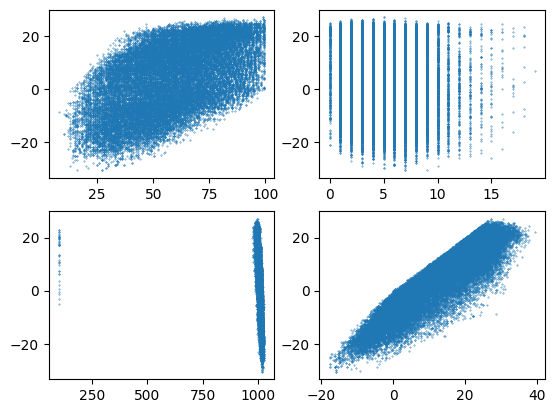

In [17]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.scatter(data['습도'], data['이슬점 온도'], s=0.1)
plt.subplot(222)
plt.scatter(data['풍속'], data['이슬점 온도'], s=0.1)
plt.subplot(223)
plt.scatter(data['현지기압'], data['이슬점 온도'], s=0.1)
plt.subplot(224)
plt.scatter(data['기온'], data['이슬점 온도'], s=0.1)
plt.show()

In [18]:
data = data[data['현지기압'] > 200]
data

,습도,풍속,현지기압,기온,이슬점 온도
0,70.7,3.0,995.0,25.0,19.3
1,61.8,3.0,993.9,27.9,19.9
2,49.7,3.0,992.3,30.5,18.8
3,66.8,6.0,992.1,28.8,22.0
4,79.6,4.0,993.4,26.3,22.5
...,...,...,...,...,...
32080,65.7,11.0,987.0,21.7,15.0
32081,83.8,5.0,989.7,18.9,16.1
32082,84.9,7.0,991.2,18.8,16.2
32083,85.9,4.0,991.7,18.4,16.0


In [ ]:
humidity = pearson_similarity(data['습도'], data['이슬점 온도'])
wind = pearson_similarity(data['풍속'], data['이슬점 온도'])
pressure = pearson_similarity(data['현지기압'], data['이슬점 온도'])
temperature = pearson_similarity(data['기온'], data['이슬점 온도'])
humidity + wind + pressure + temperature